# 2장 넘파이(NumPy)로 공부하는 선형대수
- 선형대수 = 데이터를 다루는 방법을 표시한 기호 & 언어
- 선형대수는 데이터 다루는 법, 연립방정식으로 미지수 구하는 등 데이터 분석의 기본 도구
- 선형대수에서 나오는 용어 정의와 사용법에 익숙해질 것

* 각종 데이터를 선형대수의 기호로 나타낼 수 있다
* 선형대수의 각종 연산, 특히 행렬의 곱셈을 이용하여 데이터를 조작할 수 있다
* 역행렬과 연립방정식의 해를 구하고 이를 회귀분석과 예측 문제에 활용할 수 있다

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris, fetch_olivetti_faces

## 데이터의 유형
* 스칼라(scalar)
* 벡터(vector)
* 행렬(matrix)
* 텐서(tensor)

In [5]:
# 2차원 배열
x1 = np.array([[5, 1], [3, 5], [1, 4], [0, 2]])
x1

array([[5, 1],
       [3, 5],
       [1, 4],
       [0, 2]])

In [6]:
# 1차원 배열 객체도 벡터로 인정
# 행처럼 표시되지만 실제로는 열벡터
x2 = np.array([5.1, 3.5, 1.4, 0.2])
x2

array([5.1, 3.5, 1.4, 0.2])

### 연습문제 2.1.1
Numpy를 사용해서 붓꽃 데이터 $x_{2}$에 대한 벡터 변수 x2를 만든다.

In [7]:
iris = load_iris()

In [9]:
x2 = iris.data[1, :]
x2

array([4.9, 3. , 1.4, 0.2])

## 숫자 이미지

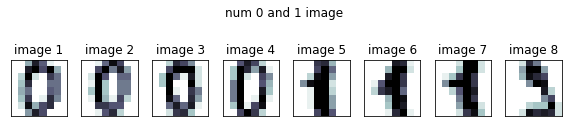

In [14]:
from sklearn.datasets import load_digits

digits = load_digits()
samples = [0, 10, 20, 30, 1, 11, 21, 31]
d = []
[d.append(digits.images[samples[i]]) for i in range(8)]

plt.figure(figsize=(8,2))

for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('image {}'.format(i + 1))
plt.suptitle("num 0 and 1 image")
plt.tight_layout()
plt.show()

### 이미지를 1차원 벡터로 변환

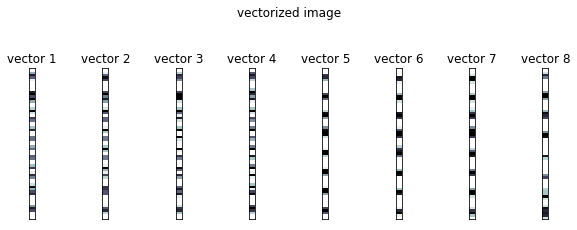

In [17]:
v = []
[v.append(d[i].reshape(-1, 1)) for i in range(8)]

plt.figure(figsize=(8, 3))
for i in  range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(v[i], aspect = 0.4, interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i+1))
    
plt.suptitle("vectorized image", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()


### 연습문제 2.1.2
Numpy를 사용해서 붓꽃 데이터 $X$에 대한 벡터 변수 X를 만든다.

In [24]:
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 텐서
- 같은 크기의 행렬이 여러 개 같이 묶여 있는 것
- 엄격한 수학적 정의: 다차원 배열로 표현되는 사상(mapping)
- 데이터 사이언스 분야에서는 다차원 배열을 보통 텐서라고 지칭

In [25]:
from scipy import misc

img_rgb = misc.face()  #컬러 이미지 로드
img_rgb.shape

(768, 1024, 3)

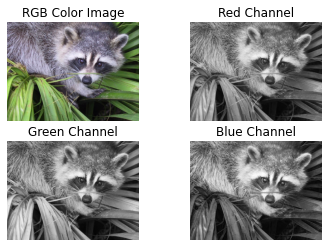

In [29]:
titles = ["RGB Color Image", "Red Channel", "Green Channel", "Blue Channel"]

for i in range(1, 5):
    plt.subplot(220+i)
    if i == 1:
        plt.imshow(img_rgb, cmap=plt.cm.gray) #컬러 이미지 출력
    else:
        plt.imshow(img_rgb[:, :, i-2], cmap=plt.cm.gray) # 0 = red, 1 = green, 2 = blue
    plt.axis("off")
    plt.title(titles[i-1])

### 연습문제 2.1.3
1. NumPy를 사용해서 붓꽃 데이터 X의 전치행렬 $X^{T}$을 구한다.
2. NumPy를 사용해서 위 전치행렬을 다시 전치한 행렬 $(X^{T})^{T}$를 구한다. 이 행렬과 원래 행렬 X를 비교한다.

In [35]:
X #original iris data matrix
X_transpose = X.T
X_transpose_transpose = X_transpose.T

print((X == X_transpose_transpose).all())

True


### 벡터와 행렬의 종류

In [37]:
# 영벡터, zeros-vector
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [38]:
# 일벡터, ones-vector
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [39]:
# 정방행렬, square matrix

In [42]:
# 대각행렬, diagonal matrix
np.diag((6, 7, 8, 9))

array([[6, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 9]])

In [43]:
# 항등행렬 (모든 대각성분의 값이 1)
np.identity(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [44]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 유사도 cosine similarity
- 벡터의 내적은 두 벡터 간의 유사도를 계산하는 데 이용 가능
- 유사도(similarity) = 두 벡터가 닮은 정도를 정량적으로 나타낸 값
    - 비슷하면 커지고 다를수록 작아진다
   

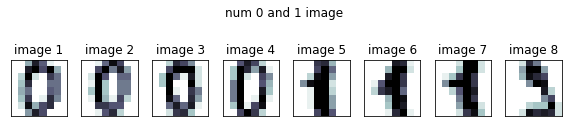

In [51]:
from sklearn.datasets import load_digits

digits = load_digits()
samples = [0, 10, 20, 30, 1, 11, 21, 31]
d = []
[d.append(digits.images[samples[i]]) for i in range(8)]

plt.figure(figsize=(8,2))

for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('image {}'.format(i + 1))
plt.suptitle("num 0 and 1 image")
plt.tight_layout()
plt.show()

### image 1 vs. image 2, 3, 4 내적값

In [48]:
np.dot(v[0].T, v[1]), np.dot(v[0].T, v[2]), np.dot(v[0].T, v[3])

(array([[3064.]]), array([[3290.]]), array([[3444.]]))

### image 1 vs. image 5, 6, 7, 8 내적값

In [50]:
np.dot(v[0].T, v[4]), np.dot(v[0].T, v[5]), np.dot(v[0].T, v[6]), np.dot(v[0].T, v[7])

(array([[1866.]]), array([[1883.]]), array([[2029.]]), array([[1916.]]))

## 벡터 선형조합 응용 > image morphing

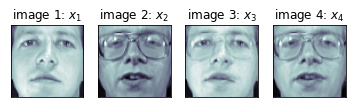

In [7]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 4)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $x_3$")

new_face = 0.3 * faces.images[6] + 0.7 * faces.images[10]
ax[3].imshow(new_face, cmap=plt.cm.bone)
ax[3].grid(False)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].set_title("image 4: $x_4$")

plt.show()